# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2610s 15us/step


(50000, 32, 32, 3)
(10000, 32, 32, 3)


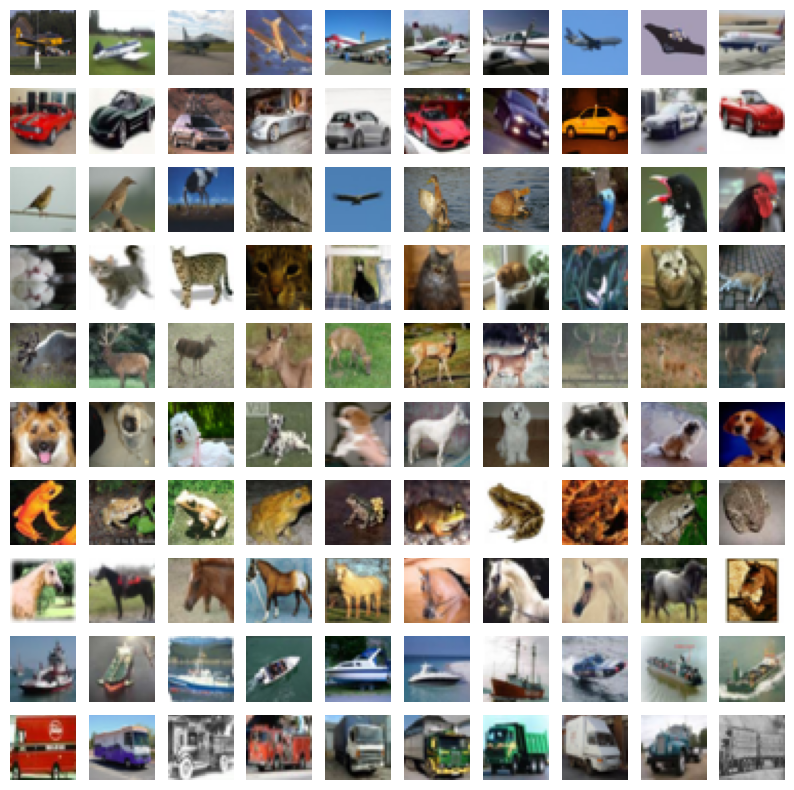

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
# Your code here :
print(x_train.shape)
print(x_test.shape)

import matplotlib.pyplot as plt

# Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
classes = np.unique(y_train)
for i, cls in enumerate(classes):
    idxs = np.where(y_train == cls)[0]
    random_idxs = np.random.choice(idxs, 10, replace=False)
    for j, idx in enumerate(random_idxs):
        ax = axes[i, j]
        ax.imshow(x_train[idx])
        ax.axis('off')
plt.show()

# Convert the labels to one-hot encoded form
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)
print(x_test.shape)

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [ ]:
#from keras.backend import clear_session
#clear_session()

In [ ]:
# Your code here :
from tensorflow.keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# input_shape = (32, 32, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Your code here :


model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1833 - loss: 2.2130 - val_accuracy: 0.2436 - val_loss: 2.0430
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3001 - loss: 1.9603 - val_accuracy: 0.3052 - val_loss: 1.9310
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3339 - loss: 1.8854 - val_accuracy: 0.3690 - val_loss: 1.8222
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3684 - loss: 1.8145 - val_accuracy: 0.3886 - val_loss: 1.7717
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3906 - loss: 1.7586 - val_accuracy: 0.3922 - val_loss: 1.7475
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3979 - loss: 1.7264 - val_accuracy: 0.4018 - val_loss: 1.7159
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4051 - loss: 1.7006 - val_accuracy: 0.4080 - val_loss: 1.6883
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4225 - loss: 1.6618 - val_accuracy: 0.3848 - val_los

*   Plot the cross entropy loss curve and the accuracy curve

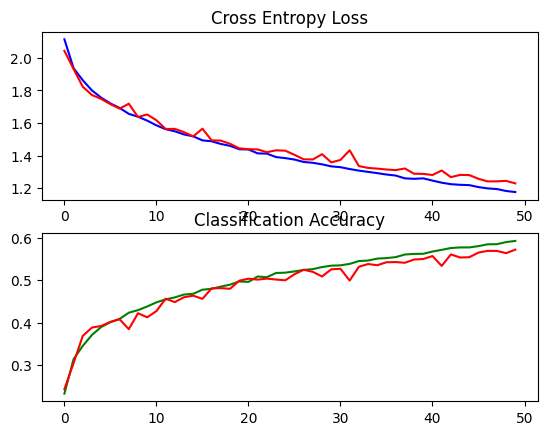

In [ ]:
# Your code here :
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='train')
plt.plot(history1.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='green', label='train')
plt.plot(history1.history['val_accuracy'], color='red', label='val')
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Your code here :

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.1894 - loss: 2.2297 - val_accuracy: 0.2906 - val_loss: 2.0201
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2966 - loss: 1.9887 - val_accuracy: 0.3248 - val_loss: 1.9175
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3464 - loss: 1.8647 - val_accuracy: 0.3444 - val_loss: 1.8423
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3671 - loss: 1.8061 - val_accuracy: 0.3566 - val_loss: 1.8509
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3989 - loss: 1.7226 - val_accuracy: 0.4220 - val_loss: 1.6674
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4188 - loss: 1.6515 - val_accuracy: 0.4328 - val_loss: 1.6156
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4397 - loss: 1.6039 - val_accuracy: 0.4376 - val_loss: 1.6031
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4479 - loss: 1.5801 - val_accuracy: 0.4246 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


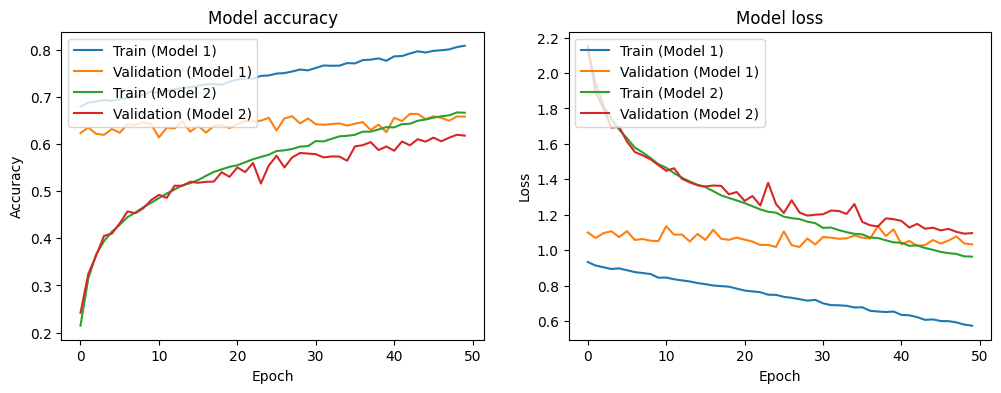

In [ ]:
# Your code here :
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train (Model 1)', 'Validation (Model 1)', 'Train (Model 2)', 'Validation (Model 2)'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train (Model 1)', 'Validation (Model 1)', 'Train (Model 2)', 'Validation (Model 2)'], loc='upper left')

plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# Your code here :
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

gt = np.argmax(y_test, axis=1)

# Predict the output for the test split
predictions = model.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

confusion_matrix(gt, predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


array([[628,  21,  56,   9,  25,   6,  33,  23, 129,  70],
       [ 24, 668,   9,  10,   6,   4,  20,  10,  46, 203],
       [ 61,  11, 418,  46, 156,  65, 132,  73,  20,  18],
       [ 20,   7,  66, 319, 109, 157, 186,  71,  19,  46],
       [ 22,   5,  62,  37, 595,  24, 122,  98,  21,  14],
       [  8,   3,  78, 138, 100, 453,  97,  98,  13,  12],
       [  6,   9,  37,  17,  56,  18, 804,  26,  12,  15],
       [ 15,   4,  25,  27,  60,  48,  39, 739,   9,  34],
       [ 71,  53,  17,  10,  11,   7,  14,   9, 743,  65],
       [ 36,  87,  10,  11,   5,   8,  26,  43,  44, 730]])

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [ ]:
# Your code here :
from sklearn.metrics import accuracy_score

accuracy_score(gt, predictions)

0.6097

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [6]:
# Your code here :

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
# Input layer
Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
Conv2D(64, (3, 3), activation='relu', padding='same'),
MaxPooling2D((2, 2)),
    
# Second block
Conv2D(128, (3, 3), activation='relu', padding='same'),
Conv2D(128, (3, 3), activation='relu', padding='same'),
MaxPooling2D((2, 2)),
    
# Third block
Conv2D(256, (3, 3), activation='relu', padding='same'),
Conv2D(256, (3, 3), activation='relu', padding='same'),
MaxPooling2D((2, 2)),
    
# Flatten layer
Flatten(),
    
    # Dense layers
Dense(128, activation='relu'),
Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)       2

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [7]:
# Your code here :
# Compile the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    # Input layer
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    # Second block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    # Third block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    # Flatten layer
    Flatten(),
    
    # Dense layers
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])

model.summary()

# Compile the model
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history3 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Predict the output for the test split
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)        

: 

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions are crucial in neural networks for the following reasons:
- They introduce non-linearity into the network, allowing it to learn complex patterns
- They help the network make decisions by transforming inputs into meaningful outputs
- They allow for backpropagation by providing gradients for weight updates
- They help control the flow of information through the network


2 - Key Differences between sigmoid and softmax:

Sigmoid:
- Outputs values between 0 and 1 for each neuron independently
- Typically used for binary classification or as gates in certain architectures
- Can suffer from vanishing gradient problem for very large or small inputs

Softmax:
- Outputs a probability distribution across all classes (sums to 1)
- Used for multi-class classification problems
- Emphasizes the highest values while suppressing lower ones
- Better suited for mutually exclusive classes

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical Crossentropy:
- Used for multi-class classification problems
- Expects one-hot encoded labels
- Computes loss across all classes

Binary Crossentropy:
- Used for binary classification problems
- Expects labels to be 0 or 1
- Computes loss for a single class (presence or absence)

